In [2]:
import os
import numpy as np
import pandas as pd
import statistics

path = 'D:/MSc Data Engineering/Semester 2/Data Mining/Big Data Challenge/Data/bbdc_2019_Bewegungsdaten/'

In [3]:
challenge_csv = pd.read_csv('D:/MSc Data Engineering/Semester 2/Data Mining/Big Data Challenge/Data/bbdc_2019_Bewegungsdaten/challenge.csv')
train_csv = pd.read_csv('D:/MSc Data Engineering/Semester 2/Data Mining/Big Data Challenge/Data/bbdc_2019_Bewegungsdaten/train.csv')
datafile = (list(train_csv['Datafile']))
train_csv.shape

(6401, 3)

In [4]:
# drop the irrelevant entries containing labels as 'lay' from the data
indexes_to_drop = list(train_csv[train_csv['Label']=='lay'].index)

indexes_to_keep = set(range(train_csv.shape[0])) - set(indexes_to_drop)

train_csv = train_csv.take(list(indexes_to_keep))

train_csv = train_csv.reset_index(drop=True)
train_csv.shape

(6385, 3)

In [5]:
sample1_csv = pd.read_csv(path+list(train_csv['Datafile'])[0], header=None)
sample1_csv.describe()
#(list(sample1_csv.mean()))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000
mean,32765.652541,32754.460140,32761.881799,33129.536288,32797.409482,33226.344861,37241.313525,34146.647183,26059.572333,29267.264166,29454.845592,29337.087189,31811.394057,28937.338691,29069.405423,29033.670726,33274.628673,36781.398928,35069.213184
std,433.822625,870.294872,226.999305,470.438965,1588.179139,1001.107135,1018.665637,1358.348576,2447.239967,2783.860674,12228.898727,5195.993694,185.595088,3403.586244,7303.666742,8579.071910,905.107704,1385.085615,1449.959324
min,28785.000000,26290.000000,30043.000000,28294.000000,13857.000000,31280.000000,33020.000000,27416.000000,19324.000000,18366.000000,80.000000,10856.000000,31312.000000,14229.000000,6546.000000,5501.000000,31384.000000,33132.000000,30873.000000
25%,32680.000000,32570.000000,32673.000000,33015.000000,32530.000000,32564.000000,36921.000000,33714.000000,25248.000000,27837.000000,28787.000000,27271.000000,31675.000000,27438.000000,25656.000000,25059.000000,32801.000000,36314.000000,34260.000000
50%,32775.000000,32811.000000,32761.000000,33157.000000,32795.000000,33080.000000,37137.000000,34386.000000,27192.000000,29224.000000,32300.000000,29680.000000,31816.000000,29232.000000,29420.000000,29472.000000,33112.000000,37104.000000,34644.000000
75%,32859.000000,33095.000000,32851.000000,33287.000000,33066.000000,33724.000000,37348.000000,34757.000000,27741.000000,30622.000000,35361.000000,32169.000000,31950.000000,30834.000000,31972.000000,33374.000000,33508.000000,37288.000000,35718.000000
max,36269.000000,36733.000000,37546.000000,36593.000000,56237.000000,38578.000000,49216.000000,37168.000000,28360.000000,39724.000000,56676.000000,46381.000000,32357.000000,39568.000000,61216.000000,63496.000000,40032.000000,46304.000000,39284.000000


In [1]:
#For Mean Dataset
train_data = pd.DataFrame(columns=np.arange(19))

num_files = train_csv.shape[0]
labels = list(train_csv['Label'])

mean = []

for i in range(num_files):
    temp_df = pd.read_csv(path+datafile[i], header=None)
    temp_mean = list(temp_df.mean())
    mean.append(statistics.mean(temp_mean))
    tmp = pd.DataFrame([temp_mean], columns=np.arange(19))
    train_data = train_data.append(tmp, ignore_index=True)

#train_data['19'] = labels[:num_files]
#train_data['Mean'] = mean

NameError: name 'pd' is not defined

In [12]:
train_data.columns = ["emg1", "emg2", "emg3", "emg4", "airborne", "acc_upper_x", "acc_upper_y", "acc_upper_z", "goniometer_x", "acc_lower_x", "acc_lower_y", "acc_lower_z", "goniometer_y", "gyro_upper_x", "gyro_upper_y", "gyro_upper_z", "gyro_lower_x", "gyro_lower_y", "gyro_lower_z"]

In [334]:
#train_data= pd.concat([train_data_1, train_data_2], axis =1)

In [338]:
#train_data= train_data.T.reset_index(drop=True).T

In [13]:
train_data

,emg1,emg2,emg3,emg4,airborne,acc_upper_x,acc_upper_y,acc_upper_z,goniometer_x,acc_lower_x,acc_lower_y,acc_lower_z,goniometer_y,gyro_upper_x,gyro_upper_y,gyro_upper_z,gyro_lower_x,gyro_lower_y,gyro_lower_z
0,32765.652541,32754.460140,32761.881799,33129.536288,32797.409482,33226.344861,37241.313525,34146.647183,26059.572333,29267.264166,29454.845592,29337.087189,31811.394057,28937.338691,29069.405423,29033.670726,33274.628673,36781.398928,35069.213184
1,32764.862094,32755.516430,32760.971629,33123.013827,32793.050997,33073.686838,37234.521099,34251.394146,25832.587359,29258.282277,29495.822948,29349.670318,31868.261088,28901.009517,29134.282456,29037.979889,33138.644999,36665.681810,35246.066080
2,32765.420626,32756.443801,32757.803785,33161.544998,32793.569718,33229.300116,35038.396292,30170.661645,21407.406721,29233.445346,29356.632677,29375.090769,32525.062959,28986.428737,28972.710699,29076.160680,33387.832368,36691.124759,35530.201622
3,32766.421617,32753.136668,32761.405092,33155.479678,32793.073694,33161.043323,37230.407325,34018.548459,30406.645824,29347.047789,29427.540866,29460.700313,32833.537293,29010.598035,29226.231353,29186.861099,33075.998213,37157.179098,34557.864225
4,32767.697293,32754.512715,32766.079573,33074.950779,32795.160788,32622.826907,37427.735849,33582.364233,28144.106645,29314.628384,28768.863002,29513.426579,32930.773585,29003.893355,29389.773585,29851.017227,24423.553733,36506.814602,35671.680066
5,32766.011114,32756.224850,32765.332573,33090.968652,32805.173554,34484.180108,37099.823311,33593.909376,28084.888572,29210.299231,29102.807638,29423.656882,32556.723853,28978.589912,29104.415503,28341.423197,33914.622400,36601.509262,35611.286406
6,32764.888947,32754.587742,32761.432687,33142.453117,32782.194866,32938.083814,37123.260346,34758.497643,29435.406496,28858.368779,29005.757988,30216.966998,32979.820849,28745.082242,28955.382923,30302.603457,32881.932949,36708.042954,35352.618125
7,32776.077519,32749.536293,32763.342495,33094.954898,32833.212121,33780.603242,37587.261452,33948.532770,26808.938689,28420.184637,30065.825229,29654.002114,32889.331924,28315.134602,29110.291050,29799.023256,33148.107118,35793.694151,36292.157858
8,32768.689577,32752.666021,32757.831236,33096.238787,32804.126492,33497.960632,37539.371410,33000.730558,26551.859955,29047.056470,31057.495966,29968.692481,32705.011939,28873.006131,29004.818328,29625.159084,25114.188125,36189.937399,35734.383349
9,32765.737579,32751.587124,32757.230231,33133.032190,32812.193842,33352.081176,37388.117565,33260.097971,28354.285514,29045.339398,27931.125262,28690.783065,33003.781666,27911.438768,30091.997201,29420.915325,32859.479356,36998.677397,35365.874038


In [148]:
# DO NOT RUN THIS
import matplotlib.pyplot as pl

%matplotlib tk
pl.hist(train_data['Mean'], bins=440)

(array([ 12.,   0.,  19.,   2.,  11.,  34.,  62.,  54., 120., 126.]),
 array([30464.8035831 , 30653.56616888, 30842.32875466, 31031.09134044,
        31219.85392622, 31408.61651201, 31597.37909779, 31786.14168357,
        31974.90426935, 32163.66685513, 32352.42944091]),
 <a list of 10 Patch objects>)

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
label=(list(train_csv['Label']))

In [15]:
label

['curve-left-step',
 'curve-left-step',
 'stand-to-sit',
 'curve-right-spin-Rfirst',
 'jump-one-leg',
 'lateral-shuffle-right',
 'curve-right-spin-Lfirst',
 'v-cut-right-Lfirst',
 'stair-down',
 'v-cut-left-Rfirst',
 'v-cut-right-Rfirst',
 'jump-two-leg',
 'sit',
 'stair-up',
 'curve-right-step',
 'sit-to-stand',
 'run',
 'curve-right-spin-Lfirst',
 'curve-right-step',
 'v-cut-left-Lfirst',
 'sit-to-stand',
 'stand',
 'v-cut-left-Lfirst',
 'v-cut-right-Rfirst',
 'curve-right-spin-Lfirst',
 'curve-left-step',
 'jump-two-leg',
 'v-cut-left-Rfirst',
 'v-cut-right-Rfirst',
 'stair-up',
 'sit-to-stand',
 'curve-left-spin-Lfirst',
 'walk',
 'sit',
 'curve-left-spin-Lfirst',
 'jump-two-leg',
 'curve-left-spin-Rfirst',
 'lateral-shuffle-left',
 'sit-to-stand',
 'stair-up',
 'v-cut-right-Rfirst',
 'stair-down',
 'sit',
 'curve-right-spin-Lfirst',
 'v-cut-right-Lfirst',
 'v-cut-right-Lfirst',
 'curve-left-spin-Rfirst',
 'curve-right-step',
 'run',
 'walk',
 'curve-left-step',
 'run',
 'curve-rig

In [17]:
train_data_l = train_data

In [18]:
train_data_l['Label'] = label

In [19]:
train_data_l

,emg1,emg2,emg3,emg4,airborne,acc_upper_x,acc_upper_y,acc_upper_z,goniometer_x,acc_lower_x,acc_lower_y,acc_lower_z,goniometer_y,gyro_upper_x,gyro_upper_y,gyro_upper_z,gyro_lower_x,gyro_lower_y,gyro_lower_z,Label
0,32765.652541,32754.460140,32761.881799,33129.536288,32797.409482,33226.344861,37241.313525,34146.647183,26059.572333,29267.264166,29454.845592,29337.087189,31811.394057,28937.338691,29069.405423,29033.670726,33274.628673,36781.398928,35069.213184,curve-left-step
1,32764.862094,32755.516430,32760.971629,33123.013827,32793.050997,33073.686838,37234.521099,34251.394146,25832.587359,29258.282277,29495.822948,29349.670318,31868.261088,28901.009517,29134.282456,29037.979889,33138.644999,36665.681810,35246.066080,curve-left-step
2,32765.420626,32756.443801,32757.803785,33161.544998,32793.569718,33229.300116,35038.396292,30170.661645,21407.406721,29233.445346,29356.632677,29375.090769,32525.062959,28986.428737,28972.710699,29076.160680,33387.832368,36691.124759,35530.201622,stand-to-sit
3,32766.421617,32753.136668,32761.405092,33155.479678,32793.073694,33161.043323,37230.407325,34018.548459,30406.645824,29347.047789,29427.540866,29460.700313,32833.537293,29010.598035,29226.231353,29186.861099,33075.998213,37157.179098,34557.864225,curve-right-spin-Rfirst
4,32767.697293,32754.512715,32766.079573,33074.950779,32795.160788,32622.826907,37427.735849,33582.364233,28144.106645,29314.628384,28768.863002,29513.426579,32930.773585,29003.893355,29389.773585,29851.017227,24423.553733,36506.814602,35671.680066,jump-one-leg
5,32766.011114,32756.224850,32765.332573,33090.968652,32805.173554,34484.180108,37099.823311,33593.909376,28084.888572,29210.299231,29102.807638,29423.656882,32556.723853,28978.589912,29104.415503,28341.423197,33914.622400,36601.509262,35611.286406,lateral-shuffle-right
6,32764.888947,32754.587742,32761.432687,33142.453117,32782.194866,32938.083814,37123.260346,34758.497643,29435.406496,28858.368779,29005.757988,30216.966998,32979.820849,28745.082242,28955.382923,30302.603457,32881.932949,36708.042954,35352.618125,curve-right-spin-Lfirst
7,32776.077519,32749.536293,32763.342495,33094.954898,32833.212121,33780.603242,37587.261452,33948.532770,26808.938689,28420.184637,30065.825229,29654.002114,32889.331924,28315.134602,29110.291050,29799.023256,33148.107118,35793.694151,36292.157858,v-cut-right-Lfirst
8,32768.689577,32752.666021,32757.831236,33096.238787,32804.126492,33497.960632,37539.371410,33000.730558,26551.859955,29047.056470,31057.495966,29968.692481,32705.011939,28873.006131,29004.818328,29625.159084,25114.188125,36189.937399,35734.383349,stair-down
9,32765.737579,32751.587124,32757.230231,33133.032190,32812.193842,33352.081176,37388.117565,33260.097971,28354.285514,29045.339398,27931.125262,28690.783065,33003.781666,27911.438768,30091.997201,29420.915325,32859.479356,36998.677397,35365.874038,v-cut-left-Rfirst


([<matplotlib.axis.XTick at 0x2e1a94e8320>,
 <a list of 22 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

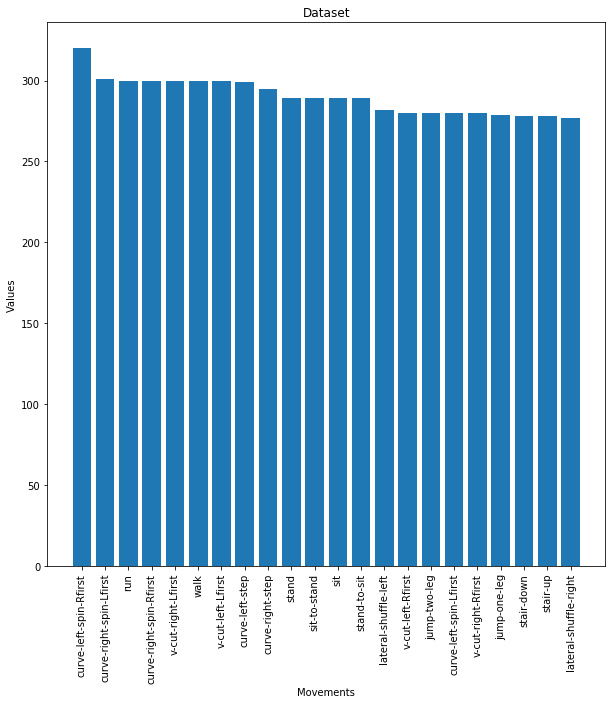

In [44]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# count the occurrence of each class 
data = train_data_l['Label'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency)
# set title and labels 
ax.set_title('Dataset') 
ax.set_xlabel('Movements') 
ax.set_ylabel('Values')
plt.xticks(points, rotation=90)


<Figure size 432x288 with 0 Axes>

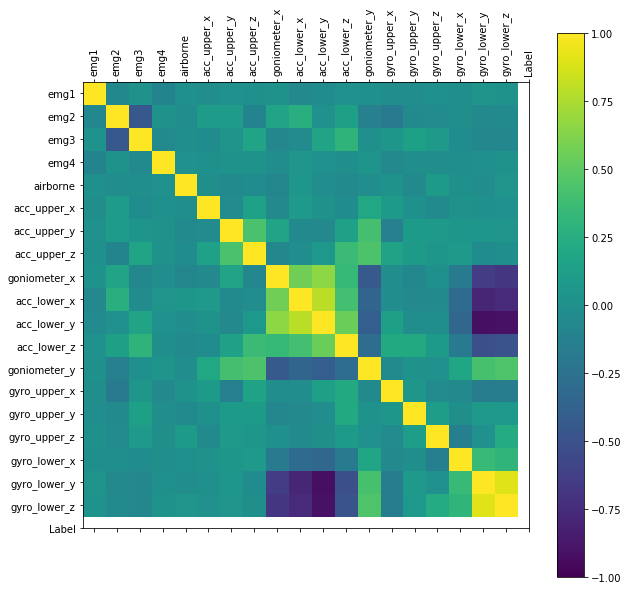

In [48]:
fig = plt.gcf()
names = ["emg1", "emg2", "emg3", "emg4", "airborne", "acc_upper_x", "acc_upper_y", "acc_upper_z", "goniometer_x", "acc_lower_x", "acc_lower_y", "acc_lower_z", "goniometer_y", "gyro_upper_x", "gyro_upper_y", "gyro_upper_z", "gyro_lower_x", "gyro_lower_y", "gyro_lower_z", "Label"]
data=train_data_l
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,20,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation =90)
ax.set_yticklabels(names)
plt.show()


In [11]:
pd.factorize(label)

(array([ 0,  0,  1, ..., 10, 13,  2], dtype=int64),
 array(['curve-left-step', 'stand-to-sit', 'curve-right-spin-Rfirst',
        'jump-one-leg', 'lateral-shuffle-right', 'curve-right-spin-Lfirst',
        'v-cut-right-Lfirst', 'stair-down', 'v-cut-left-Rfirst',
        'v-cut-right-Rfirst', 'jump-two-leg', 'sit', 'stair-up',
        'curve-right-step', 'sit-to-stand', 'run', 'v-cut-left-Lfirst',
        'stand', 'curve-left-spin-Lfirst', 'walk',
        'curve-left-spin-Rfirst', 'lateral-shuffle-left'], dtype=object))

In [12]:
label_numbers = pd.factorize(label)[0]

In [13]:
set(label_numbers)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}

In [14]:
label_numbers

array([ 0,  0,  1, ..., 10, 13,  2], dtype=int64)

In [15]:
label_numbers = label_numbers.tolist()
label_numbers

[0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 5,
 13,
 16,
 14,
 17,
 16,
 9,
 5,
 0,
 10,
 8,
 9,
 12,
 14,
 18,
 19,
 11,
 18,
 10,
 20,
 21,
 14,
 12,
 9,
 7,
 11,
 5,
 6,
 6,
 20,
 13,
 15,
 19,
 0,
 15,
 2,
 11,
 3,
 2,
 16,
 18,
 14,
 4,
 11,
 8,
 18,
 11,
 7,
 17,
 1,
 15,
 5,
 15,
 4,
 16,
 16,
 17,
 15,
 17,
 10,
 10,
 13,
 8,
 16,
 19,
 3,
 0,
 20,
 7,
 7,
 2,
 7,
 21,
 0,
 0,
 3,
 3,
 19,
 9,
 3,
 6,
 2,
 13,
 6,
 11,
 10,
 21,
 18,
 18,
 4,
 19,
 16,
 19,
 0,
 5,
 14,
 3,
 10,
 20,
 1,
 20,
 16,
 14,
 1,
 13,
 12,
 2,
 7,
 9,
 7,
 5,
 8,
 1,
 8,
 1,
 17,
 12,
 11,
 4,
 17,
 10,
 4,
 21,
 8,
 15,
 3,
 13,
 4,
 14,
 7,
 18,
 15,
 4,
 8,
 18,
 21,
 7,
 21,
 4,
 16,
 18,
 12,
 6,
 2,
 9,
 21,
 15,
 12,
 10,
 7,
 3,
 2,
 4,
 5,
 4,
 0,
 19,
 11,
 3,
 3,
 9,
 4,
 12,
 19,
 1,
 2,
 9,
 15,
 12,
 12,
 17,
 11,
 9,
 12,
 3,
 9,
 8,
 3,
 20,
 0,
 6,
 1,
 13,
 21,
 8,
 4,
 14,
 9,
 6,
 21,
 10,
 15,
 11,
 10,
 4,
 21,
 6,
 14,
 17,
 20,
 16,
 17,
 4,
 0,
 

In [16]:
train_data['Label'] = label_numbers

In [17]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Label
0,32765.652541,32754.460140,32761.881799,33129.536288,32797.409482,33226.344861,37241.313525,34146.647183,26059.572333,29267.264166,29454.845592,29337.087189,31811.394057,28937.338691,29069.405423,29033.670726,33274.628673,36781.398928,35069.213184,0
1,32764.862094,32755.516430,32760.971629,33123.013827,32793.050997,33073.686838,37234.521099,34251.394146,25832.587359,29258.282277,29495.822948,29349.670318,31868.261088,28901.009517,29134.282456,29037.979889,33138.644999,36665.681810,35246.066080,0
2,32765.420626,32756.443801,32757.803785,33161.544998,32793.569718,33229.300116,35038.396292,30170.661645,21407.406721,29233.445346,29356.632677,29375.090769,32525.062959,28986.428737,28972.710699,29076.160680,33387.832368,36691.124759,35530.201622,1
3,32766.421617,32753.136668,32761.405092,33155.479678,32793.073694,33161.043323,37230.407325,34018.548459,30406.645824,29347.047789,29427.540866,29460.700313,32833.537293,29010.598035,29226.231353,29186.861099,33075.998213,37157.179098,34557.864225,2
4,32767.697293,32754.512715,32766.079573,33074.950779,32795.160788,32622.826907,37427.735849,33582.364233,28144.106645,29314.628384,28768.863002,29513.426579,32930.773585,29003.893355,29389.773585,29851.017227,24423.553733,36506.814602,35671.680066,3
5,32766.011114,32756.224850,32765.332573,33090.968652,32805.173554,34484.180108,37099.823311,33593.909376,28084.888572,29210.299231,29102.807638,29423.656882,32556.723853,28978.589912,29104.415503,28341.423197,33914.622400,36601.509262,35611.286406,4
6,32764.888947,32754.587742,32761.432687,33142.453117,32782.194866,32938.083814,37123.260346,34758.497643,29435.406496,28858.368779,29005.757988,30216.966998,32979.820849,28745.082242,28955.382923,30302.603457,32881.932949,36708.042954,35352.618125,5
7,32776.077519,32749.536293,32763.342495,33094.954898,32833.212121,33780.603242,37587.261452,33948.532770,26808.938689,28420.184637,30065.825229,29654.002114,32889.331924,28315.134602,29110.291050,29799.023256,33148.107118,35793.694151,36292.157858,6
8,32768.689577,32752.666021,32757.831236,33096.238787,32804.126492,33497.960632,37539.371410,33000.730558,26551.859955,29047.056470,31057.495966,29968.692481,32705.011939,28873.006131,29004.818328,29625.159084,25114.188125,36189.937399,35734.383349,7
9,32765.737579,32751.587124,32757.230231,33133.032190,32812.193842,33352.081176,37388.117565,33260.097971,28354.285514,29045.339398,27931.125262,28690.783065,33003.781666,27911.438768,30091.997201,29420.915325,32859.479356,36998.677397,35365.874038,8


In [ ]:
#Not to run
class_translate = {"run":0, "walk":1, "stand":2, "sit":3, "sit-to-stand":4, "stand-to-sit":5,\
                 "stair-up":6, "stair-down":7, "jump-one-leg":8, "jump-two-leg":9, "curve-left-step":10,\
                   "curve-right-step":11, "curve-left-spin-Lfirst":12, "curve-left-spin-Rfirst":13, "curve-right-spin-Lfirst":14,\
                   "curve-right-spin-Rfirst":15, "lateral-shuffle-left":16, "lateral-shuffle-right":17,"v-cut-left-Lfirst":18,\
                   "v-cut-left-Rfirst":19, "v-cut-right-Lfirst":20, "v-cut-right-Rfirst":21,"X":22}

In [18]:
y = train_data['Label']
x = train_data.drop(['Label'], axis=1)


In [19]:
#Manual Spilt. Run only if not running the below split
x_train = x.iloc[0:4816,:]
x_test= x.iloc[4816:,:]
y_train= y.iloc[0:4816,]
y_test=y.iloc[4816:,]



In [345]:
y

array([ 0,  0,  1, ..., 10, 13,  2], dtype=int64)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.4, random_state=1)

In [116]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation ='relu', max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=21,tol=0.000000001)

In [117]:
clf.fit(x_train, y_train)

Iteration 1, loss = 21.93059652
Iteration 2, loss = 21.94156231
Iteration 3, loss = 21.74380236
Iteration 4, loss = 21.81130643
Iteration 5, loss = 21.68520442
Iteration 6, loss = 21.76351493
Iteration 7, loss = 21.61168328
Iteration 8, loss = 21.79223528
Iteration 9, loss = 21.55105999
Iteration 10, loss = 21.75404216
Iteration 11, loss = 21.63615277
Iteration 12, loss = 21.65605279
Iteration 13, loss = 21.59159259
Iteration 14, loss = 21.64668436
Iteration 15, loss = 21.49954569
Iteration 16, loss = 21.46806175
Iteration 17, loss = 21.48528055
Iteration 18, loss = 21.58114423
Iteration 19, loss = 21.63382969
Iteration 20, loss = 21.37457958
Iteration 21, loss = 21.68584691
Iteration 22, loss = 21.39388841
Iteration 23, loss = 21.43231376
Iteration 24, loss = 21.43332015
Iteration 25, loss = 21.31648327
Iteration 26, loss = 21.45285399
Iteration 27, loss = 21.42850552
Iteration 28, loss = 21.19541414
Iteration 29, loss = 21.51628895
Iteration 30, loss = 21.52876095
Iteration 31, loss 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=21, shuffle=True, solver='adam', tol=1e-09,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [118]:
y_pred = clf.predict(x_test)

In [119]:
accuracy_score(y_test, y_pred)

0.06002087682672234

In [20]:
challenge_data = pd.DataFrame(columns=np.arange(19))

num_files_c = challenge_csv.shape[0]
#labels = list(train_csv['Label'])

mean = []

for i in range(num_files_c):
    temp_df_c = pd.read_csv(path+datafile[i], header=None)
    temp_mean_c = list(temp_df_c.mean())
    mean.append(statistics.mean(temp_mean_c))
    tmp_c = pd.DataFrame([temp_mean_c], columns=np.arange(19))
    challenge_data = challenge_data.append(tmp_c, ignore_index=True)


In [21]:
challenge_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,32765.652541,32754.460140,32761.881799,33129.536288,32797.409482,33226.344861,37241.313525,34146.647183,26059.572333,29267.264166,29454.845592,29337.087189,31811.394057,28937.338691,29069.405423,29033.670726,33274.628673,36781.398928,35069.213184
1,32764.862094,32755.516430,32760.971629,33123.013827,32793.050997,33073.686838,37234.521099,34251.394146,25832.587359,29258.282277,29495.822948,29349.670318,31868.261088,28901.009517,29134.282456,29037.979889,33138.644999,36665.681810,35246.066080
2,32765.420626,32756.443801,32757.803785,33161.544998,32793.569718,33229.300116,35038.396292,30170.661645,21407.406721,29233.445346,29356.632677,29375.090769,32525.062959,28986.428737,28972.710699,29076.160680,33387.832368,36691.124759,35530.201622
3,32766.421617,32753.136668,32761.405092,33155.479678,32793.073694,33161.043323,37230.407325,34018.548459,30406.645824,29347.047789,29427.540866,29460.700313,32833.537293,29010.598035,29226.231353,29186.861099,33075.998213,37157.179098,34557.864225
4,32767.697293,32754.512715,32766.079573,33074.950779,32795.160788,32622.826907,37427.735849,33582.364233,28144.106645,29314.628384,28768.863002,29513.426579,32930.773585,29003.893355,29389.773585,29851.017227,24423.553733,36506.814602,35671.680066
5,32766.011114,32756.224850,32765.332573,33090.968652,32805.173554,34484.180108,37099.823311,33593.909376,28084.888572,29210.299231,29102.807638,29423.656882,32556.723853,28978.589912,29104.415503,28341.423197,33914.622400,36601.509262,35611.286406
6,32764.888947,32754.587742,32761.432687,33142.453117,32782.194866,32938.083814,37123.260346,34758.497643,29435.406496,28858.368779,29005.757988,30216.966998,32979.820849,28745.082242,28955.382923,30302.603457,32881.932949,36708.042954,35352.618125
7,32776.077519,32749.536293,32763.342495,33094.954898,32833.212121,33780.603242,37587.261452,33948.532770,26808.938689,28420.184637,30065.825229,29654.002114,32889.331924,28315.134602,29110.291050,29799.023256,33148.107118,35793.694151,36292.157858
8,32768.689577,32752.666021,32757.831236,33096.238787,32804.126492,33497.960632,37539.371410,33000.730558,26551.859955,29047.056470,31057.495966,29968.692481,32705.011939,28873.006131,29004.818328,29625.159084,25114.188125,36189.937399,35734.383349
9,32765.737579,32751.587124,32757.230231,33133.032190,32812.193842,33352.081176,37388.117565,33260.097971,28354.285514,29045.339398,27931.125262,28690.783065,33003.781666,27911.438768,30091.997201,29420.915325,32859.479356,36998.677397,35365.874038


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import model_selection

In [42]:
#Extra tree classifier
extc = ExtraTreesClassifier(n_estimators=500,max_features= 19, criterion= 'gini',min_samples_split= 50,max_depth= 50, min_samples_leaf= 5) 

In [43]:
extc.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=50, max_features=19, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=50,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
y_pred_e = extc.predict(x_test)

In [45]:
accuracy_score(y_test, y_pred_e)

0.2721221613155834

In [88]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt',19]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 114, 219, 324, 428, 533, 638, 743, 847, 952, 1057, 1162, 1266, 1371, 1476, 1581, 1685, 1790, 1895, 2000], 'max_features': ['auto', 'sqrt', 19], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 6], 'bootstrap': [True, False]}


In [89]:
from sklearn.ensemble import RandomForestRegressor
#Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
rf = ExtraTreesClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [90]:
rf.fit(x_train, y_train)
predictions= rf.predict(x_test) 

C:\Users\Merint Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [64]:
# Calculate the absolute errors
errors = abs(predictions - y_test)


In [65]:
# Print out the mean absolute error (mae)
print('Average model error:', round(np.mean(errors), 2), 'degrees.')


Average model error: 4.93 degrees.


In [68]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / len(y_test))


In [69]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.81 %.


In [170]:
#y_pred_r = rf.predict(x_test)

In [91]:
accuracy_score(y_test, predictions)

0.288566953797964

In [92]:
predict_final = rf.predict(challenge_data)


In [93]:
pf_l=list(predict_final)
pf_l

[0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 5,
 13,
 16,
 14,
 17,
 16,
 9,
 5,
 0,
 10,
 8,
 9,
 12,
 14,
 18,
 19,
 11,
 18,
 10,
 20,
 21,
 14,
 12,
 9,
 7,
 11,
 5,
 6,
 6,
 20,
 13,
 15,
 19,
 0,
 15,
 2,
 11,
 3,
 2,
 16,
 18,
 14,
 4,
 11,
 8,
 18,
 11,
 7,
 17,
 1,
 15,
 5,
 15,
 4,
 16,
 16,
 17,
 15,
 17,
 10,
 10,
 13,
 8,
 16,
 19,
 3,
 0,
 20,
 7,
 7,
 2,
 7,
 21,
 0,
 0,
 3,
 3,
 19,
 9,
 3,
 6,
 2,
 13,
 6,
 11,
 10,
 21,
 18,
 18,
 4,
 19,
 16,
 19,
 0,
 5,
 14,
 3,
 10,
 8,
 1,
 20,
 16,
 14,
 1,
 13,
 12,
 2,
 7,
 9,
 7,
 5,
 8,
 1,
 8,
 1,
 17,
 12,
 11,
 4,
 17,
 10,
 4,
 21,
 8,
 15,
 3,
 13,
 4,
 14,
 7,
 18,
 15,
 4,
 8,
 18,
 21,
 7,
 21,
 4,
 16,
 18,
 12,
 6,
 2,
 9,
 21,
 15,
 12,
 10,
 7,
 3,
 2,
 4,
 5,
 4,
 0,
 19,
 11,
 3,
 3,
 9,
 4,
 12,
 19,
 1,
 2,
 9,
 15,
 12,
 12,
 17,
 11,
 9,
 12,
 3,
 9,
 8,
 3,
 20,
 0,
 6,
 1,
 13,
 21,
 8,
 4,
 14,
 9,
 6,
 21,
 10,
 15,
 11,
 10,
 4,
 21,
 6,
 14,
 17,
 20,
 16,
 17,
 4,
 0,
 1

In [83]:
pf_l = [ round(elem) for elem in pf_l ]

In [84]:
pf_l

[5.0,
 1.0,
 1.0,
 14.0,
 4.0,
 9.0,
 5.0,
 6.0,
 8.0,
 9.0,
 9.0,
 8.0,
 7.0,
 10.0,
 13.0,
 12.0,
 15.0,
 5.0,
 13.0,
 16.0,
 13.0,
 16.0,
 16.0,
 9.0,
 5.0,
 1.0,
 9.0,
 8.0,
 9.0,
 13.0,
 13.0,
 18.0,
 13.0,
 8.0,
 16.0,
 9.0,
 19.0,
 17.0,
 12.0,
 12.0,
 9.0,
 7.0,
 11.0,
 5.0,
 7.0,
 6.0,
 19.0,
 13.0,
 14.0,
 17.0,
 2.0,
 14.0,
 2.0,
 11.0,
 7.0,
 6.0,
 14.0,
 18.0,
 9.0,
 9.0,
 11.0,
 8.0,
 12.0,
 10.0,
 7.0,
 17.0,
 3.0,
 15.0,
 13.0,
 15.0,
 6.0,
 16.0,
 15.0,
 16.0,
 15.0,
 17.0,
 9.0,
 10.0,
 13.0,
 9.0,
 15.0,
 15.0,
 6.0,
 4.0,
 19.0,
 8.0,
 8.0,
 2.0,
 7.0,
 19.0,
 6.0,
 4.0,
 5.0,
 3.0,
 12.0,
 9.0,
 6.0,
 6.0,
 7.0,
 13.0,
 8.0,
 11.0,
 9.0,
 17.0,
 14.0,
 18.0,
 4.0,
 13.0,
 13.0,
 19.0,
 2.0,
 5.0,
 12.0,
 3.0,
 8.0,
 13.0,
 6.0,
 20.0,
 15.0,
 11.0,
 3.0,
 13.0,
 12.0,
 3.0,
 8.0,
 9.0,
 8.0,
 5.0,
 9.0,
 1.0,
 8.0,
 1.0,
 17.0,
 11.0,
 10.0,
 4.0,
 15.0,
 9.0,
 4.0,
 18.0,
 8.0,
 14.0,
 3.0,
 13.0,
 4.0,
 14.0,
 8.0,
 18.0,
 15.0,
 6.0,
 8.0,
 18.0,
 19.0,
 8.0,
 2

In [85]:
pf_l= list(map(int,pf_l))


In [86]:
pf_l

[5,
 1,
 1,
 14,
 4,
 9,
 5,
 6,
 8,
 9,
 9,
 8,
 7,
 10,
 13,
 12,
 15,
 5,
 13,
 16,
 13,
 16,
 16,
 9,
 5,
 1,
 9,
 8,
 9,
 13,
 13,
 18,
 13,
 8,
 16,
 9,
 19,
 17,
 12,
 12,
 9,
 7,
 11,
 5,
 7,
 6,
 19,
 13,
 14,
 17,
 2,
 14,
 2,
 11,
 7,
 6,
 14,
 18,
 9,
 9,
 11,
 8,
 12,
 10,
 7,
 17,
 3,
 15,
 13,
 15,
 6,
 16,
 15,
 16,
 15,
 17,
 9,
 10,
 13,
 9,
 15,
 15,
 6,
 4,
 19,
 8,
 8,
 2,
 7,
 19,
 6,
 4,
 5,
 3,
 12,
 9,
 6,
 6,
 7,
 13,
 8,
 11,
 9,
 17,
 14,
 18,
 4,
 13,
 13,
 19,
 2,
 5,
 12,
 3,
 8,
 13,
 6,
 20,
 15,
 11,
 3,
 13,
 12,
 3,
 8,
 9,
 8,
 5,
 9,
 1,
 8,
 1,
 17,
 11,
 10,
 4,
 15,
 9,
 4,
 18,
 8,
 14,
 3,
 13,
 4,
 14,
 8,
 18,
 15,
 6,
 8,
 18,
 19,
 8,
 20,
 4,
 16,
 18,
 11,
 7,
 2,
 13,
 19,
 15,
 12,
 11,
 7,
 4,
 2,
 5,
 6,
 7,
 0,
 17,
 9,
 7,
 6,
 10,
 4,
 10,
 19,
 4,
 2,
 9,
 15,
 12,
 12,
 17,
 11,
 9,
 9,
 8,
 9,
 8,
 4,
 20,
 3,
 6,
 2,
 12,
 18,
 9,
 4,
 10,
 8,
 6,
 16,
 9,
 15,
 11,
 10,
 5,
 21,
 8,
 12,
 17,
 17,
 14,
 14,
 6,
 4,
 14,
 4,
 

In [87]:
submission=pd.DataFrame(pf_l)
submission.to_csv('D:\MSc Data Engineering/Semester 2/Data Mining/Big Data Challenge/result_nn.csv', index=False)

In [308]:
cm= confusion_matrix(y_test, predictions)

cm.shape()

In [188]:
cm

array([[20,  5,  3,  1,  5,  3,  4,  2,  1,  1,  1,  5,  1,  2,  2,  2,
         2,  2,  3,  0,  3,  3],
       [ 3, 32,  2,  2,  3,  2,  2,  2,  4,  3,  2,  6,  3,  3,  2,  2,
         4,  5,  7,  4,  3,  1],
       [ 6,  1, 31,  0,  4,  1,  6,  0,  5,  4,  3,  2,  2,  3,  2,  3,
         4,  2,  3,  4,  3,  1],
       [ 3,  2,  1, 19,  1,  5,  3,  1,  7,  2,  2,  2,  2,  2,  3,  5,
         3,  4,  5,  3,  4,  3],
       [ 3,  5,  2,  2, 26,  7,  3,  6,  2,  1,  1,  0,  1,  2,  4,  5,
         5,  6,  2,  2,  3,  4],
       [ 5,  3,  4,  1,  0, 26,  3,  1,  6,  3,  3,  4,  3,  4,  3,  2,
         7,  2,  4,  1,  8,  1],
       [ 7,  1,  3,  4,  3,  3, 24,  5,  2,  1,  1,  6,  2,  3,  1,  5,
         4,  3,  5,  1,  4,  3],
       [ 2,  2,  6,  1,  1,  1,  1, 23,  2,  1,  3,  4,  2,  1,  3,  1,
         3,  3,  2,  5,  2,  3],
       [ 1,  3,  1,  2,  3,  1,  1,  1, 33,  2,  0,  2,  1,  1,  5,  4,
         1,  4,  1,  2,  6,  2],
       [ 3,  0,  4,  2,  1,  2,  4,  2,  2, 30,  3,  3,

In [291]:
list(predictions)

[4,
 5,
 19,
 8,
 9,
 18,
 9,
 11,
 21,
 11,
 18,
 18,
 13,
 7,
 13,
 18,
 1,
 8,
 17,
 6,
 11,
 9,
 15,
 18,
 6,
 15,
 4,
 5,
 2,
 6,
 20,
 20,
 21,
 10,
 2,
 19,
 6,
 4,
 21,
 13,
 19,
 0,
 2,
 9,
 18,
 19,
 14,
 21,
 15,
 17,
 15,
 12,
 13,
 19,
 7,
 1,
 6,
 10,
 11,
 1,
 18,
 13,
 12,
 20,
 16,
 0,
 13,
 17,
 1,
 17,
 1,
 18,
 11,
 9,
 15,
 4,
 19,
 0,
 11,
 8,
 0,
 11,
 15,
 16,
 10,
 21,
 0,
 10,
 1,
 11,
 15,
 11,
 13,
 10,
 0,
 14,
 2,
 7,
 19,
 7,
 4,
 0,
 3,
 2,
 0,
 21,
 4,
 9,
 2,
 15,
 6,
 19,
 3,
 1,
 18,
 8,
 18,
 5,
 11,
 1,
 20,
 11,
 6,
 14,
 19,
 6,
 11,
 15,
 20,
 18,
 0,
 1,
 14,
 10,
 0,
 5,
 14,
 17,
 2,
 16,
 21,
 20,
 2,
 19,
 15,
 6,
 11,
 6,
 5,
 6,
 2,
 17,
 12,
 21,
 19,
 1,
 7,
 9,
 12,
 19,
 10,
 15,
 6,
 16,
 21,
 20,
 9,
 11,
 7,
 10,
 2,
 19,
 0,
 0,
 5,
 8,
 19,
 6,
 5,
 13,
 20,
 16,
 2,
 8,
 13,
 2,
 12,
 9,
 11,
 0,
 13,
 9,
 12,
 1,
 8,
 2,
 10,
 2,
 15,
 7,
 0,
 2,
 5,
 9,
 8,
 6,
 11,
 20,
 21,
 18,
 21,
 1,
 14,
 18,
 5,
 9,
 20,
 12,
 14,
 19,

In [138]:
#Bayes
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB(priors=None, var_smoothing=1e-09)

In [139]:
gb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [140]:
y_pred_g = rf.predict(x_test)

In [141]:
accuracy_score(y_test, y_pred_g)

0.2948851774530271

In [295]:
#Neural network It didn't work
np.random.seed(42)  
weights = np.random.rand(19,1)  
bias = np.random.rand(1)  
lr = 0.05  

In [296]:
def sigmoid(a):  
    return 1/(1+np.exp(-a))

In [297]:
#Derivative
def sigmoid_der(a):  
    return sigmoid(a)*(1-sigmoid(a))

In [300]:
for epoch in range(20000):  
    inputs = x
    XW = np.dot(x, weights) + bias
    z = sigmoid(XW)
    err = z - y
    print(err.sum())
    dcost_dpred = err
    dpred_dz = sigmoid_der(z)
    z_delta = dcost_dpred * dpred_dz
    inputs = x.T
    weights -= lr * np.dot(inputs, z_delta)
    for num in z_delta:
        bias -= lr * num

Exception: Data must be 1-dimensional

In [312]:
#sklearn


from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [363]:
#Machine Learning Algorithms
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
]

In [364]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [ ]:
row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare